In [1]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt, matplotlib as mpl
import tjy_udf as tjy
from Data import Data
from Pha3D import Pha3D
print("tjy_udf: ", list(filter(lambda x: '__' not in x, dir(tjy)))) # Print contained functions
mpl.rc_file('tjy.mplstyle')

tjy_udf:  ['CalcF', 'H_find', 'Heights', 'Kap_D', 'elread', 'get_fp', 'get_fs', 'git_sync', 'lighten_color', 'phread', 'phreadxyz', 'plot_anim', 'plot_pha', 'plot_pha_feed', 'ticks']


In [8]:
fp_work, fp_home = 'C:/Users/takas/Downloads/', 'E:/Downloads/' 
fp = fp_work
pha3d = Pha3D("ph_a25s25e3_cyl24-2.dat", dims=(18.4, 20.2, 48.2 ), discs=(0.20,0.20,0.20), fprefix=fp)

g = pha3d.plot_vol(isomin=0.10, fprefix=fp, 
                   n_coarse=3, zmax=25.0, reflect_over='sw', write_html=True)

Wrote to C:/Users/takas/Downloads/pha_vol.html
Opening...


In [10]:
fig = g
fname=fp+'pha_vol.html'
write_html = True
open_html = True

####################

fig.update_layout(scene_xaxis_showticklabels=True, scene_yaxis_showticklabels=True, scene_zaxis_showticklabels=True,
                          scene_aspectmode='data',
                          template='simple_white', width=1920, height=1080)
fig.update_traces(showscale=False)

if write_html: 
    #fig.write_html(fname) 
    '''
    f = open(fname, "w")
    f.close()
    with open(fname, 'a') as f:
        f.write(fig.to_html(full_html=False, include_plotlyjs=True))
    f.close()
    '''
    f = open(fname, "w")
    f.close()
    with open(fname, 'a') as f:
        f.write(fig.to_html(full_html=False, include_plotlyjs='cdn'))
    f.close()
    
    print('Wrote to {}'.format(fname))
    
    if open_html: 
        import webbrowser
        webbrowser.open(fname)
        print('Opening...')

Wrote to C:/Users/takas/Downloads/pha_vol.html
Opening...


In [ ]:
import plotly.express as px
import kaleido

### Make a figure generator

def generate_figures(): # can be async as well
  data = px.data.gapminder()
  for country in data["country"].unique(): # list all countries in dataset
    # yield unique plot for each country
    yield px.line(
        data.query(f'country=="{country}"'),
        x="year",
        y="lifeExp",
        title=f"Life expectancy in {country}"
        )

# four processors
kaleido.write_fig_sync(generate_figures(), path="./output/", n=4)
# file names will be taken from figure title


### If you need more control, use an object

def generate_figure_objects():
  data = px.data.gapminder()
  for country in data["country"].unique(): # list all countries in dataset
    fig = px.line(
        data.query(f'country=="{country}"'),
        x="year",
        y="lifeExp",
        title=f"Life expectancy in {country}"
        )
    yield {"fig": fig, "path": f"./output/{country}.jpg"}
    # customize file name

# four processors
kaleido.write_fig_from_object_sync(generate_figure_objects(), n=4)

In [1]:
from PIL import Image

import matplotlib.pyplot as plt
import numpy as np

AttributeError: 'Figure' object has no attribute 'bbox_to_anchor'

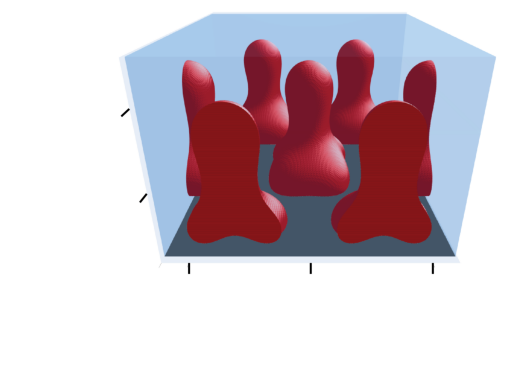

In [28]:
img = np.asarray(Image.open("C:/Users/takas/Downloads/pha-test-01.png"))
plt.imshow(img)

f = plt.gcf()
plt.axis('off')
plt.text('s', 0.5, 0.5, transform=f.bbox_to_anchor)

plt.show()

In [19]:
f.axes[0].xaxis.